In [1]:
# imports for using the notebook

import pandas as pd
import sys
sys.path.append('../')
from embedding_functions_hugo.embedding_functions import *
from sklearn.preprocessing import StandardScaler
import numpy as np
from numpy import genfromtxt
import nltk
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, SpectralClustering, AgglomerativeClustering, FeatureAgglomeration
from sklearn.decomposition import PCA
import seaborn as sns
import networkx as nx

In [2]:
# Specifying datasets from different reddit pages

df_gaming = pd.read_csv('../data/scrapes/gaming.csv')
df_satis = pd.read_csv('../data/scrapes/SatisfactoryGame.csv')
df_marauders = pd.read_csv('../data/scrapes/MaraudersGame.csv')
df_tarkov = pd.read_csv('../data/scrapes/EscapefromTarkov.csv')
df_politics = pd.read_csv('../data/scrapes/politics.csv')


# Datasets post cleaning the text
# df_politics['cleaned_text'] = prep_pipeline(df_politics, 'comment_text')
# df_politics['short'] = shorten_sens(df_politics['cleaned_text'], 50)

# Function to speed up the process: 

def shorten_and_clean_dataset (comment_csv, comment_column : str, desired_comment_length : int):
    dataframe = pd.read_csv(comment_csv)
    dataframe['cleaned_text'] = prep_pipeline(dataframe, comment_column)
    dataframe['short'] = shorten_sens(dataframe['cleaned_text'], desired_comment_length)
    return dataframe

In [3]:
# LOADING EMBEDDINGS FROM FILES

politics_embeddings_big = np.load('../data/big_embeddings/politics.npy')
politics_embeddings = np.load('../data/embeddings/politics_embeddings.npy')

# gaming_embeddings = np.load('../data/embeddings/gaming_embeddings.npy')
# marauders_embeddings = np.load('../data/embeddings/marauders_embeddings.npy')
# tarkov_embeddings = np.load('../data/embeddings/tarkov_embeddings.npy')

# include below when the satisfactory embeddings are done
# satisfactory_embeddings = np.load('../data/embeddings/satisfactory_embeddings.npy')

In [45]:
politics_user_embeddings = pair_users_embeddings(df_politics, politics_embeddings, True)

In [43]:
print(len(politics_user_embeddings))
print(len(politics_embeddings_big))

10384
10384


In [47]:
authors = []
posts = []
users = []

for i, j in zip(df_politics['comment_author'], df_politics['post_id']):
    authors.append(i)
    posts.append(j)
    if i not in users:
        users.append(i)

In [48]:
Squeem = reduce_to_one_dimension_kmeans(dict(zip(users, politics_embeddings_big)))
x_axis = []
for name,emb in zip(Squeem[0], Squeem[1]):
    x_axis.append([str(name),emb])

def sortie(beb):
    return beb[0]
x_axis = sorted(x_axis, key=sortie)

In [49]:
# Test for making new dataframe with columns: 
# should be exportable to networkx - preferably edgelist
# Author (node_id),pca_x-axis , post_id

# authors = []
# x_axis = []
# posts = []

# df_politics = df_politics.drop('post_text', axis=1).dropna()

In [50]:
# df_politics = df_politics.sort_values(by='comment_author')
# for ball in df_politics.iloc:
#     ID, Author = ball[2], ball[6]
#     authors.append(Author)
#     posts.append(ID)

In [51]:
edge_list = []
for i, j in zip(authors, posts):
    edge_list.append((i,j))

class_dict={}
for i, j in zip(Squeem[0], Squeem[1]):
    class_dict[i] = j

posts_dict = {}
for i in posts:
    posts_dict[i] = 'white'

In [52]:
n1 = nx.from_edgelist(edgelist=edge_list)
nx.set_node_attributes(n1, class_dict, 'classes')
nx.set_node_attributes(n1, posts_dict, 'classes')
# color_map = {0: 'Green', 1 : 'Red', 2: 'Yellow'}

classes = nx.get_node_attributes(n1, 'classes')
for i in classes:
    if classes[i] == 0:
        classes[i] = 'red'
    if classes[i] == 1:
        classes[i] = 'green'

In [13]:
colors = [classes.get(node) for node in n1.nodes()]

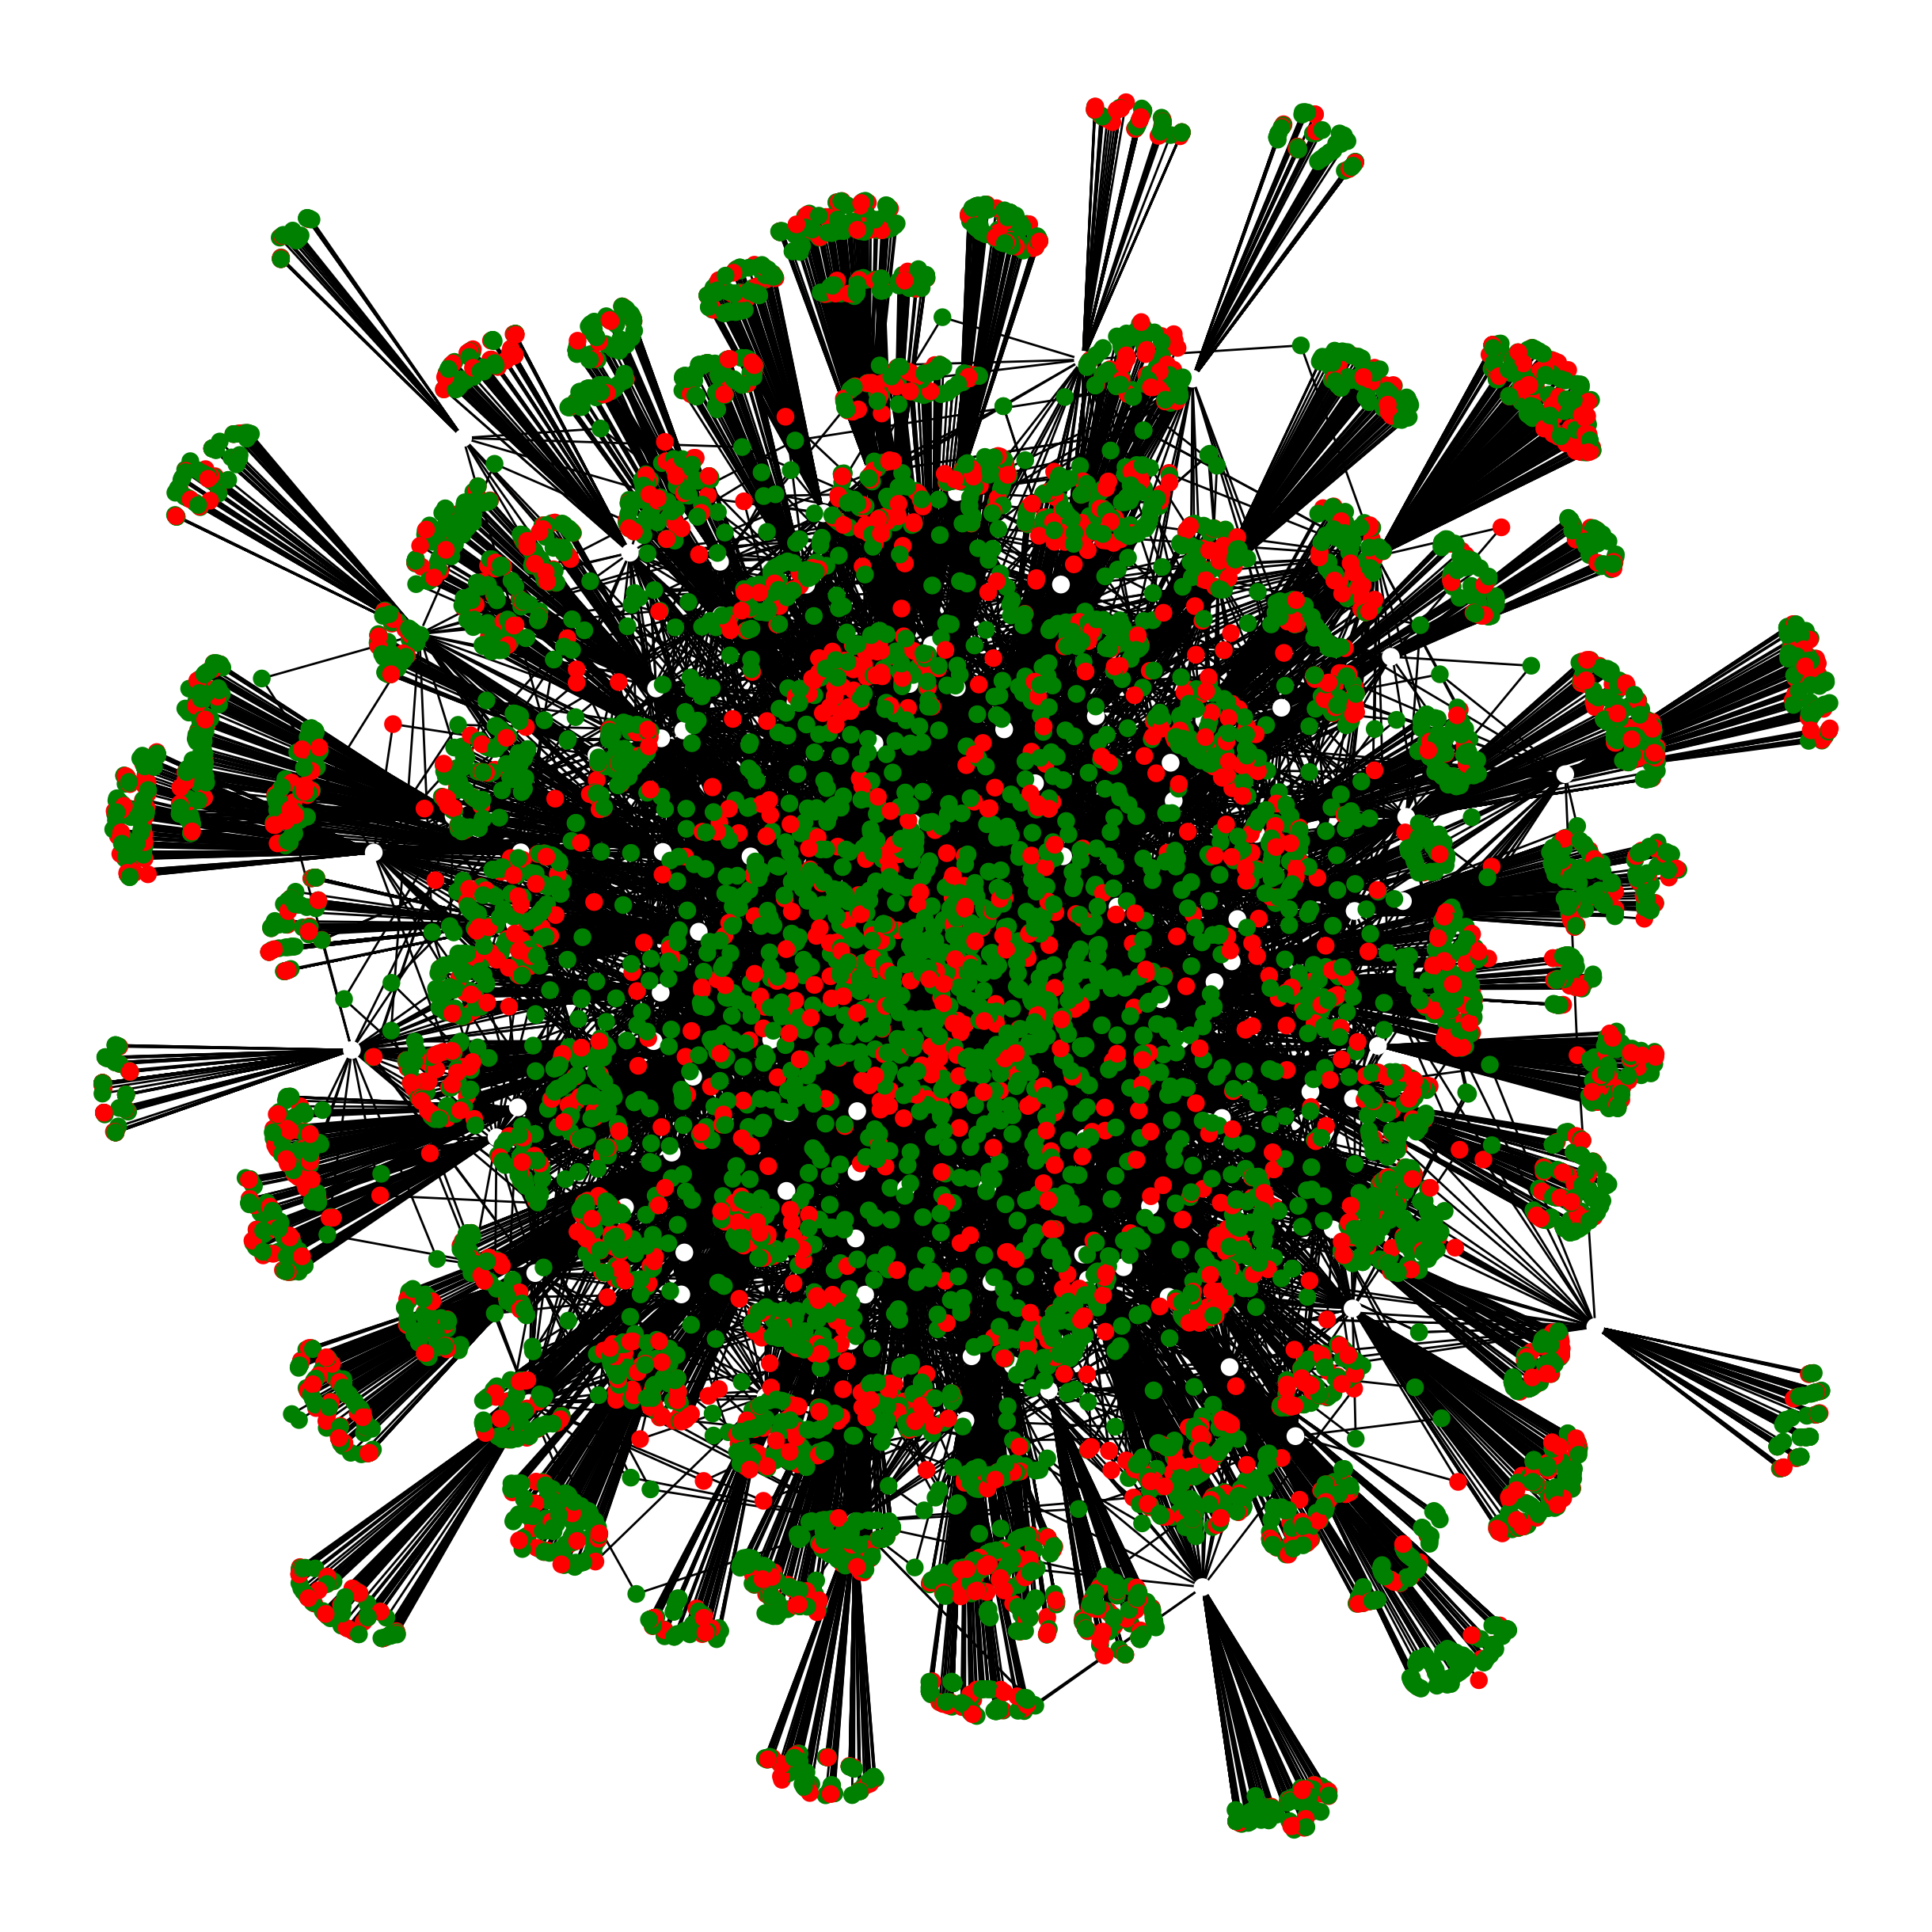

In [55]:
plt.figure(1, figsize= (12, 12), dpi=200)
nx.draw(n1,node_size = 50, font_size=8, node_color = colors)